# Simple Linear Regression 

## Learning Outcomes

- Utilize scikit-learn to implement Linear Regression
- Create a model, train and test it then use the model

### Importing Packages

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Download data

Get the dataset from:
https://www.kaggle.com/code/stieranka/simple-linear-regression/input

## Using the Data

After getting the data from kaggle,lets have a go at reading it.

### Read the data


In [5]:
df = pd.read_csv("./FuelConsumptionCo2.csv")
#head let's us see the first 5 rows
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### What is the data telling us?
Let's explore

- Describe is a method in Pandas that let's us get descriptive statistics of the DataFrame
- We get statistics such as count, mean, std (standard deviation), min, 25th percentile, 50th percentile (median), 75th percentile,
and max for each column in the DataFrame

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


We can now explore some features 


Let's pick out features that will help us

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


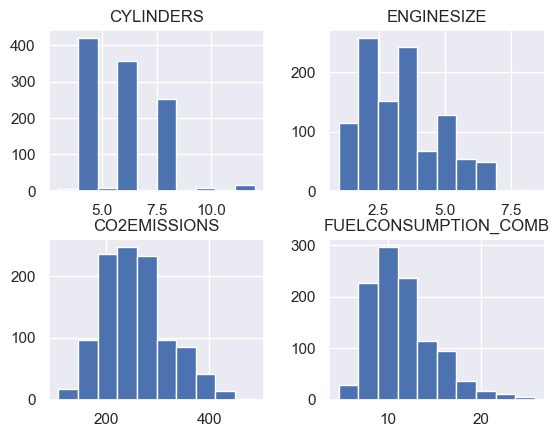

In [33]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()



Now we plot each feature against Emission to see the lienarity fo the relationship

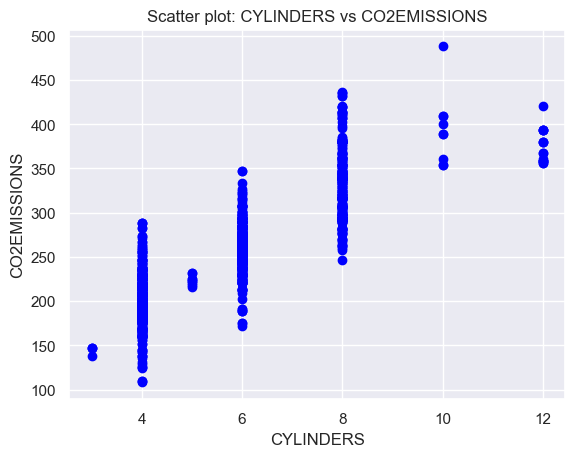

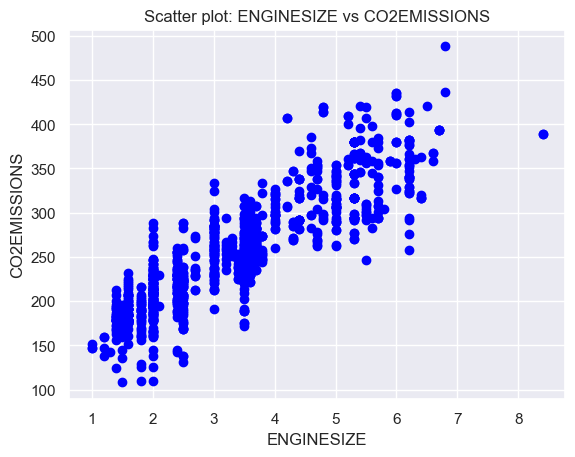

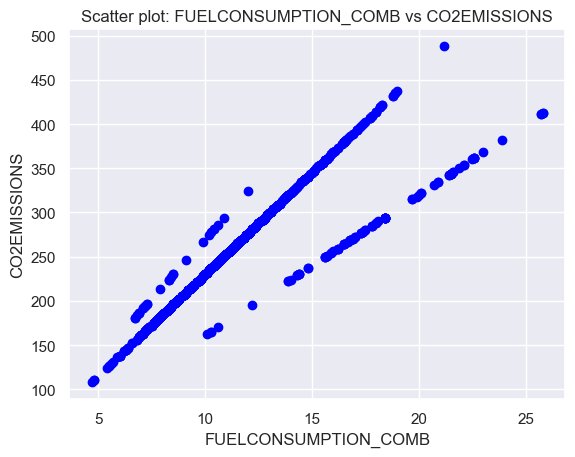

In [41]:
# Extract the target variable
target_variable = 'CO2EMISSIONS'

# Loop through each column in viz (excluding the target variable)
for column in viz.columns[viz.columns != target_variable]:
    plt.scatter(viz[column], viz[target_variable], color='blue')
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.title(f"Scatter plot: {column} vs {target_variable}")
    plt.show()


### Creating train and test dataset

We have to split the training adn testing data.


Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [46]:
msk = np.random.rand(len(df))< 0.8
train = cdf[msk]
test = cdf[~msk]


### Simple Linear Regression

Linear Regression works by minimizing the residual sum of squares by fitting a linear model with coefficients B =(B1,B2,B3...,Bn) between the actual value y in the dataset and predicted value y using linear approximation

The equation for simpel linear regression,with one independent variable:

$ y = B_0 + B_1 \cdot x + \varepsilon $

Where,
- $y$ is the dependent variable (the actual value in the dataset).
- $x$ is the independent variable
- $B0$ is the $y$-intercept (the value of $y$ when $x=0$)
- $B1$ is the slope(change in $y$ for a unit change in $x$)
- $\varepsilon$ represents teh error term or residual 

The goal is to determine the values of $B0$ and $B1$ that minimize the sum of squared differences between the observed values and the values predicted by the linear model. This is often achieved through the least squares method, which minimizes the sum of the squared residuals: \
\
$\text{Minimize:} \sum_{i=1}^{n} (y_i - (\hat{B_0} + \hat{B_1} \cdot x_i))^2$

Where,


- $\hat{B_0}$  and $ \hat{B_1}$  are the estimated coefficients.
- $ y_i $ is the observed (actual) value for the $i$-th data point.
- $ x_i $ is the $i$-th value of the independent variable.

The goal is to minimize the sum of squared residuals:

$ \text{Minimize:} \sum_{i=1}^{n} (y_i - (\hat{B_0} + \hat{B_1} \cdot x_i))^2 $




### Training data

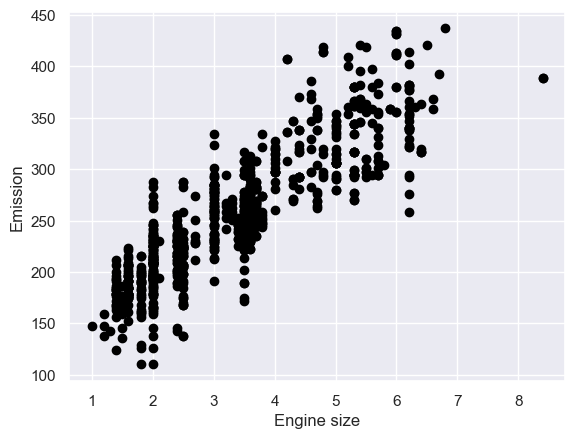

In [49]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modelling

In [52]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print('Coefficients: ',regr.coef_)
print("Intercept", regr.intercept_)

Coefficients:  [[38.85412585]]
Intercept [126.4153256]


### Plot Outputs

Text(0, 0.5, 'Emission')

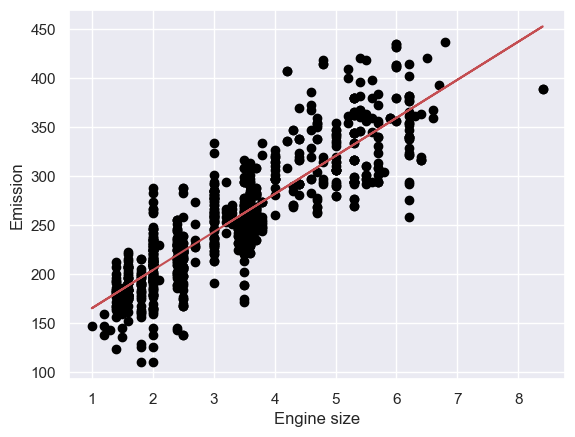

In [54]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [55]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.15
Residual sum of squares (MSE): 866.05
R2-score: 0.78
